In [67]:
import numpy as np
import pandas as pd

In [68]:
df = pd.read_csv("housing.csv")

In [69]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [70]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [71]:
#Explore this dataset

In [72]:
df["ocean_proximity"].nunique()

5

In [73]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [74]:
df.shape

(20640, 10)

In [75]:
df = pd.get_dummies(df, columns=["ocean_proximity"])

In [76]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [78]:
df.shape

(20640, 14)

In [81]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [82]:
df.isnull().sum()

longitude                       0
latitude                        0
housing_median_age              0
total_rooms                     0
total_bedrooms                207
population                      0
households                      0
median_income                   0
median_house_value              0
ocean_proximity_<1H OCEAN       0
ocean_proximity_INLAND          0
ocean_proximity_ISLAND          0
ocean_proximity_NEAR BAY        0
ocean_proximity_NEAR OCEAN      0
dtype: int64

In [83]:
df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].mean())

In [84]:
df.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64

In [85]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
#plt.plot(df["median_income"], df["median_house_value"])

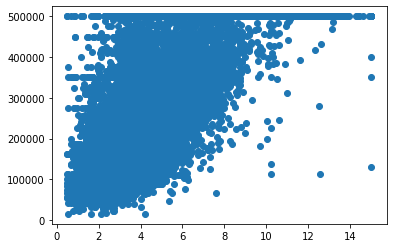

In [88]:
plt.scatter(df["median_income"], df["median_house_value"])

In [89]:
# Input Data
x = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']]

y = df['median_house_value']

(array([ 877., 3612., 4099., 3771., 2799., 1769., 1239.,  752.,  479.,
        1243.]),
 array([ 14999. ,  63499.2, 111999.4, 160499.6, 208999.8, 257500. ,
        306000.2, 354500.4, 403000.6, 451500.8, 500001. ]),
 <a list of 10 Patch objects>)

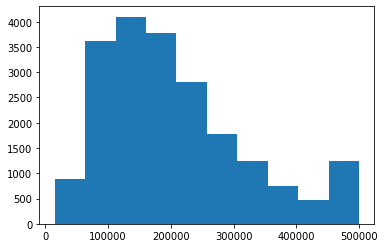

In [64]:
plt.hist(df['median_house_value'])

In [49]:
x.shape

(20640, 13)

In [50]:
y.shape

(20640,)

In [51]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [52]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size =0.2,
                                                    random_state = 0)

In [53]:
print("xtrain shape : ", xtrain.shape)
print("xtest shape  : ", xtest.shape)
print("ytrain shape : ", ytrain.shape)
print("ytest shape  : ", ytest.shape)

xtrain shape :  (16512, 13)
xtest shape  :  (4128, 13)
ytrain shape :  (16512,)
ytest shape  :  (4128,)


In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

LinearRegression()

In [63]:
regressor.coef_

array([-2.68729910e+04, -2.55222624e+04,  1.07274356e+03, -4.29097784e+00,
        6.75765322e+01, -3.86809282e+01,  7.80527480e+01,  3.87557948e+04,
       -2.48711513e+04, -6.34751288e+04,  1.36842599e+05, -2.91870349e+04,
       -1.93092843e+04])

In [56]:
y_pred = regressor.predict(xtest)

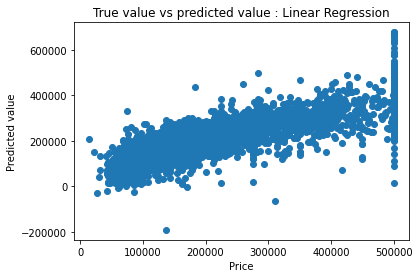

In [60]:
plt.scatter(ytest, y_pred)
plt.xlabel("Price")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.show()

In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(ytest, y_pred)
mae = mean_absolute_error(ytest,y_pred)
print("Mean Square Error : ", mse)
print("Mean Absolute Error : ", mae)

Mean Square Error :  4718206968.301585
Mean Absolute Error :  49697.07016481144
